In [68]:
#  Import libraries

import pandas as pd  # data manipulation
import numpy as np   # linear algebra

# Load data to dataframe df
df=pd.read_csv('Dataset.csv')
df.head(10)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
5,5,5,62.0,100.0,NaN,124.0,85.0,61.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,6,0,17072
6,6,6,61.0,100.0,NaN,101.0,75.0,58.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,7,0,17072
7,7,7,68.0,100.0,35.78,142.0,93.5,78.0,16.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,8,0,17072
8,8,8,71.0,100.0,NaN,121.0,74.0,91.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,9,0,17072
9,9,9,69.0,100.0,NaN,120.0,79.0,98.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,10,0,17072


In [69]:
df.shape

(1552210, 44)

In [70]:
# All Patient IDs who got diagnosed with Sepsis Label 1 at some time
PatientIDs_Sepsis=df['Patient_ID'][df['SepsisLabel']==1].unique()

# DataFrame of Patients with Sepsis Label 1 at some time in ICU
df_Sepsis1=df[df.Patient_ID.isin(PatientIDs_Sepsis)]

len(PatientIDs_Sepsis)

2932

In [71]:
# Patient IDs admitted in ICU with Sepsis Label 1 
PatientIDs_SepsisAdm=df['Patient_ID'][(df['SepsisLabel']==1) & (df['Hour']==0)]

# DataFrame of Patients with Sepsis Label 1 at admission time in ICU
df_Sepsis_Adm=df[df.Patient_ID.isin(PatientIDs_SepsisAdm)]
len(PatientIDs_SepsisAdm)

426

In [72]:
# DataFrame of Patients with Sepsis Label 1 after admission in ICU
df_Sepsis_AftAdm=df_Sepsis1.merge(df_Sepsis_Adm, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
len(df_Sepsis_AftAdm['Patient_ID'].unique())

2506

In [74]:
# DataFrame of Patients with Sepsis Label 0 throughout their stay in ICU
df_Sepsis_Nein=df.merge(df_Sepsis1, how ='outer' , indicator=True).loc[lambda x: x['_merge']=='left_only']
len(df_Sepsis_Nein['Patient_ID'].unique())

37404

In [75]:
# Adding new column to original df dataframe to differentiate patients who went into state of shock after admission 
# (SAftAdm), who were admitted with septic shock (SAdm) and those who never went into shock (NS)

df['Sepsis_Diag']=np.nan
df.loc[df.Patient_ID.isin(PatientIDs_SepsisAdm), 'Sepsis_Diag'] = 'SAdm'
df.loc[df.Patient_ID.isin(PatientIDs_Sepsis) & df['Sepsis_Diag'].isnull(), 'Sepsis_Diag'] = 'SAftAdm'
df.loc[df['Sepsis_Diag'].isnull(), 'Sepsis_Diag'] = 'NS'

df['Sepsis_Diag'].value_counts()

NS         1379800
SAftAdm     168764
SAdm          3646
Name: Sepsis_Diag, dtype: int64

In [76]:
len(df['Patient_ID'][df['Sepsis_Diag']=='SAdm'].unique())

426

In [77]:
len(df['Patient_ID'][df['Sepsis_Diag']=='SAftAdm'].unique())

2506

In [78]:
len(df['Patient_ID'][df['Sepsis_Diag']=='NS'].unique())

37404

In [79]:
# Separating out first non-null values from each column
df1 = df_Sepsis_AftAdm.groupby('Patient_ID', as_index=False).first()
df1.head(100)

,Patient_ID,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,_merge
0,9,0,0,117.0,99.0,36.00,116.0,97.00,81.0,20.0,...,124.0,64.0,27.92,1,NaN,NaN,-0.03,1,0,left_only
1,11,0,0,81.0,100.0,38.00,136.5,90.00,71.0,12.5,...,NaN,225.0,65.79,1,NaN,NaN,-0.02,2,0,left_only
2,15,0,0,85.0,NaN,36.10,117.0,90.00,74.0,11.0,...,NaN,127.0,58.54,0,NaN,NaN,-405.34,1,0,left_only
3,18,0,0,104.0,98.0,38.56,166.0,83.00,66.5,16.0,...,NaN,675.0,39.28,1,1.0,0.0,-0.02,1,0,left_only
4,22,0,0,77.0,100.0,NaN,126.0,77.00,53.0,16.0,...,NaN,148.0,77.26,0,0.0,1.0,-135.81,5,0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1192,0,0,124.0,89.5,36.20,112.5,75.00,55.5,22.5,...,94.0,134.0,21.27,0,NaN,NaN,-0.03,1,0,left_only
96,1194,0,0,99.0,100.0,36.06,144.0,70.00,80.0,38.0,...,NaN,165.0,77.61,0,1.0,0.0,-0.02,2,0,left_only
97,1201,0,0,62.0,95.0,37.50,152.5,73.50,53.0,27.5,...,NaN,329.0,48.30,1,1.0,0.0,-369.20,1,0,left_only
98,1206,0,0,122.0,92.0,36.89,160.0,126.00,59.0,29.0,...,NaN,220.0,37.01,0,1.0,0.0,-0.02,1,0,left_only


In [80]:
df_FirstVal= df.groupby('Patient_ID', as_index=False).first()
df_FirstVal.head(10)

,Patient_ID,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Sepsis_Diag
0,1,0,0,97.0,95.0,36.11,98.0,75.33,NaN,19.0,...,NaN,317.0,83.14,0,NaN,NaN,-0.03,1,0,NS
1,2,0,0,61.0,99.0,36.44,124.0,65.00,43.0,17.5,...,NaN,158.0,75.91,0,0.0,1.0,-98.60,1,0,NS
2,3,0,0,87.0,96.0,37.11,131.0,70.33,50.0,29.0,...,NaN,488.0,45.82,0,1.0,0.0,-1195.71,1,0,NS
3,4,0,0,103.5,97.0,36.78,107.5,70.50,52.0,18.0,...,NaN,220.0,65.71,0,0.0,1.0,-8.77,1,0,NS
4,5,0,0,84.0,97.5,37.28,140.5,94.50,NaN,17.5,...,NaN,273.0,28.09,1,1.0,0.0,-0.05,2,0,NS
5,6,0,0,109.0,100.0,36.56,118.0,86.00,NaN,18.5,...,NaN,298.0,52.01,1,1.0,0.0,-0.03,3,0,NS
6,7,0,0,155.5,94.5,37.56,147.5,102.00,82.0,33.0,...,NaN,26.0,64.24,1,1.0,0.0,-0.05,1,0,NS
7,8,0,0,73.0,99.0,36.06,100.0,67.00,49.5,16.5,...,NaN,357.0,87.08,1,NaN,NaN,-2.23,1,0,NS
8,9,0,0,117.0,99.0,36.00,116.0,97.00,81.0,20.0,...,124.0,64.0,27.92,1,NaN,NaN,-0.03,1,0,SAftAdm
9,10,0,0,82.0,100.0,35.50,112.0,79.50,63.0,14.0,...,NaN,115.0,76.71,0,0.0,1.0,-2.36,3,0,NS


In [81]:
df_FirstVal.shape

(40336, 45)

In [83]:
df_FirstVal.to_csv('FirstVal.csv')

In [36]:
# df_Sepsis_AftAdm.to_csv('delete.csv')

In [84]:
df_FirstVal.isnull().sum()

Patient_ID              0
Unnamed: 0              0
Hour                    0
HR                      5
O2Sat                  18
Temp                  284
SBP                   282
MAP                   104
DBP                  7411
Resp                   71
EtCO2               37120
BaseExcess          27126
HCO3                20119
FiO2                22527
pH                  21401
PaCO2               21980
SaO2                27248
AST                 25979
BUN                  2018
Alkalinephos        26163
Calcium              5339
Chloride            18925
Creatinine           2049
Bilirubin_direct    38279
Glucose              1580
Lactate             27843
Magnesium            4931
Phosphate           12015
Potassium            1867
Bilirubin_total     26088
TroponinI           33283
Hct                  2317
Hgb                  2448
PTT                 20098
WBC                  2625
Fibrinogen          35821
Platelets            2577
Age                     0
Gender      

<AxesSubplot:>

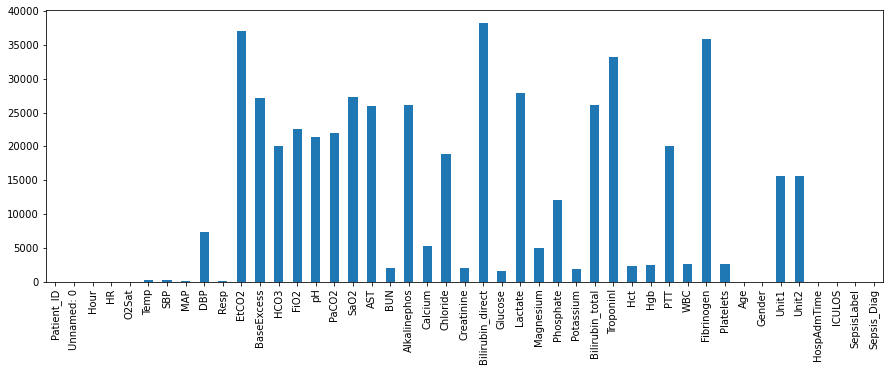

In [85]:
df_FirstVal.isnull().sum().plot.bar(figsize=(15,5))

In [86]:
# SIRS Score Conditions

SIRS_Temp=(df_FirstVal['Temp']>38) |( df_FirstVal['Temp']<36)
SIRS_HR=(df_FirstVal['HR']>90)
SIRS_Resp=(df_FirstVal['Resp']>20) |( df_FirstVal['PaCO2']<32)
SIRS_WBC=(df_FirstVal['WBC']>12000) |( df_FirstVal['WBC']<4000)

df_FirstVal['SIRS_Score']=np.where(SIRS_Temp, 1, 0)+np.where(SIRS_HR, 1, 0)+np.where(SIRS_Resp, 1, 0)+np.where(SIRS_WBC, 1, 0)

df_FirstVal['SIRS_Score'].value_counts()

1    15734
2    15556
3     6692
0     1270
4     1084
Name: SIRS_Score, dtype: int64

In [87]:
# Calculating Sepsis Stage 1, when SIRS Score is >=2
SIRS_Yes=df_FirstVal['SIRS_Score']>1
# SIRS_No=df_FirstVal['SIRS_Score']<2

df_FirstVal['Shock_Stage1']=np.where(SIRS_Yes, 1, 0)

df_FirstVal.head(5)

,Patient_ID,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,...,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Sepsis_Diag,SIRS_Score,Shock_Stage1
0,1,0,0,97.0,95.0,36.11,98.0,75.33,NaN,19.0,...,83.14,0,NaN,NaN,-0.03,1,0,NS,2,1
1,2,0,0,61.0,99.0,36.44,124.0,65.00,43.0,17.5,...,75.91,0,0.0,1.0,-98.60,1,0,NS,1,0
2,3,0,0,87.0,96.0,37.11,131.0,70.33,50.0,29.0,...,45.82,0,1.0,0.0,-1195.71,1,0,NS,2,1
3,4,0,0,103.5,97.0,36.78,107.5,70.50,52.0,18.0,...,65.71,0,0.0,1.0,-8.77,1,0,NS,2,1
4,5,0,0,84.0,97.5,37.28,140.5,94.50,NaN,17.5,...,28.09,1,1.0,0.0,-0.05,2,0,NS,1,0


In [88]:
df_FirstVal['Shock_Stage1'].value_counts()

1    23332
0    17004
Name: Shock_Stage1, dtype: int64

<AxesSubplot:>

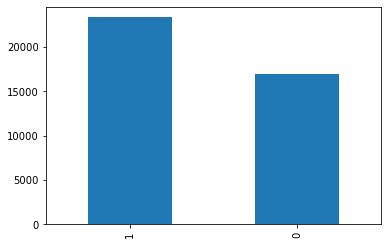

In [89]:
df_FirstVal['Shock_Stage1'].value_counts().plot.bar()

<AxesSubplot:xlabel='Sepsis_Diag'>

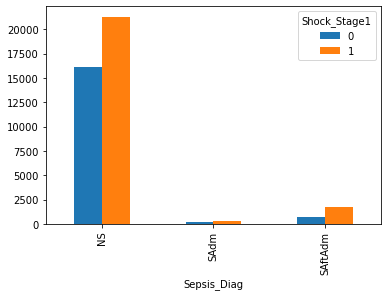

In [90]:
# Plotting Spsis Stage 1 in each 3 categories of patients
df_gb = df_FirstVal.groupby(['Sepsis_Diag', 'Shock_Stage1']).size().unstack()
df_gb.plot(kind = 'bar')

In [91]:
df_FirstVal.groupby(['Sepsis_Diag', 'Shock_Stage1']).size()

Sepsis_Diag  Shock_Stage1
NS           0               16108
             1               21296
SAdm         0                 165
             1                 261
SAftAdm      0                 731
             1                1775
dtype: int64

In [99]:
# Analysis by Respiratory and Metabolic -> Alkalosis and Acidosis


resp_Acidosis=(df_FirstVal['pH']<7.4) & ( df_FirstVal['PaCO2']>45) & ((df_FirstVal['HCO3']>21) & (df_FirstVal['HCO3']<27))
resp_Alkalosis=(df_FirstVal['pH']>7.4) & (df_FirstVal['PaCO2']<35) & ((df_FirstVal['HCO3']>21) & (df_FirstVal['HCO3']<27))
meta_Acidosis=(df_FirstVal['pH']<7.4) & ( df_FirstVal['HCO3']<22) & ((df_FirstVal['PaCO2']>34) & (df_FirstVal['PaCO2']<46))
meta_Alkalosis=(df_FirstVal['pH']>7.4) & (df_FirstVal['HCO3']>26) & ((df_FirstVal['PaCO2']>34) & (df_FirstVal['PaCO2']<46))

resp_Acidosis_Comp=(df_FirstVal['pH']<7.4) & ( df_FirstVal['PaCO2']>45) & (df_FirstVal['HCO3']>26)
resp_Alkalosis_Comp=(df_FirstVal['pH']>7.4) & (df_FirstVal['PaCO2']<35) & (df_FirstVal['HCO3']<22)
meta_Acidosis_Comp=(df_FirstVal['pH']<7.4) & ( df_FirstVal['HCO3']<22) & (df_FirstVal['PaCO2']<35)
meta_Alkalosis_Comp=(df_FirstVal['pH']>7.4) & (df_FirstVal['HCO3']>26) & (df_FirstVal['PaCO2']>45)

ABG_normal= ((df_FirstVal['pH']>7.34) & (df_FirstVal['pH']<7.46)) & ((df_FirstVal['PaCO2']>34)&(df_FirstVal['PaCO2']<46)) & ((df_FirstVal['HCO3']>21) & (df_FirstVal['HCO3']<27))




df_FirstVal.loc[ABG_normal, 'ABG_Anal'] = 'NORM'

df_FirstVal.loc[resp_Acidosis, 'ABG_Anal'] = 'RAC'
df_FirstVal.loc[resp_Alkalosis, 'ABG_Anal'] = 'RALK'
df_FirstVal.loc[meta_Acidosis, 'ABG_Anal'] = 'MAC'
df_FirstVal.loc[meta_Alkalosis, 'ABG_Anal'] = 'MALK'

df_FirstVal.loc[resp_Acidosis_Comp, 'ABG_Anal'] = 'CRAC'
df_FirstVal.loc[resp_Alkalosis_Comp, 'ABG_Anal'] = 'CRALK'
df_FirstVal.loc[meta_Acidosis_Comp, 'ABG_Anal'] = 'CMAC'
df_FirstVal.loc[meta_Alkalosis_Comp, 'ABG_Anal'] = 'CMALK'

df_FirstVal.groupby(['Sepsis_Diag', 'ABG_Anal']).size()

Sepsis_Diag  ABG_Anal
NS           CMAC         547
             CMALK        287
             CRAC         794
             CRALK        431
             MAC         1534
             MALK         859
             NORM        4645
             RAC         1538
             RALK         749
SAdm         CMAC           8
             CMALK          5
             CRAC          11
             CRALK          5
             MAC           19
             MALK          10
             NORM          27
             RAC           12
             RALK           2
SAftAdm      CMAC          91
             CMALK         37
             CRAC          99
             CRALK         74
             MAC          258
             MALK         116
             NORM         463
             RAC          124
             RALK          84
dtype: int64

<AxesSubplot:xlabel='Sepsis_Diag'>

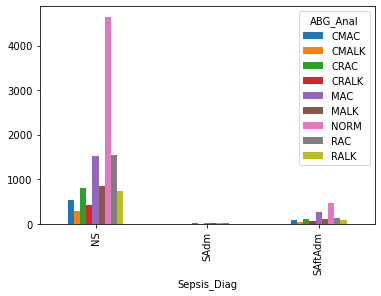

In [102]:
# Plotting ABG ANalysis in each 3 categories of patients
df_ABGAnal = df_FirstVal.groupby(['Sepsis_Diag', 'ABG_Anal']).size().unstack()
df_ABGAnal.plot(kind = 'bar')

In [107]:
df_FirstVal.groupby(['Sepsis_Diag', 'ABG_Anal'])[['Alkalinephos','BaseExcess','Lactate', 'Creatinine','WBC','Bilirubin_direct']].corr()

Alkalinephos  BaseExcess   Lactate  \
Sepsis_Diag ABG_Anal                                                        
NS          CMAC     Alkalinephos          1.000000   -0.051505  0.125026   
                     BaseExcess           -0.051505    1.000000 -0.364090   
                     Lactate               0.125026   -0.364090  1.000000   
                     Creatinine            0.106783   -0.182584 -0.023230   
                     WBC                   0.128343   -0.084247  0.187176   
...                                             ...         ...       ...   
SAftAdm     RALK     BaseExcess           -0.190612    1.000000 -0.237331   
                     Lactate               0.153245   -0.237331  1.000000   
                     Creatinine           -0.144452   -0.064501  0.161708   
                     WBC                   0.166572    0.078317 -0.140329   
                     Bilirubin_direct      0.936965    0.160403 -0.541476   

                                       Creatinine       WBC  Bilirubin_direct  
Sepsis_Diag ABG_Anal                                                           
NS          CMAC     Alkalinephos        0.106783  0.128343          0.316098  
                     BaseExcess         -0.182584 -0.084247         -0.387289  
                     Lactate            -0.023230  0.187176          0.173919  
                     Creatinine          1.000000 -0.057031          0.342934  
                     WBC                -0.057031  1.000000         -0.073764  
...                                           ...       ...               ...  
SAftAdm     RALK     BaseExcess         -0.064501  0.078317          0.160403  
                     Lactate             0.161708 -0.140329         -0.541476  
                     Creatinine          1.000000 -0.198717         -0.892251  
                     WBC                -0.198717  1.000000          0.540356  
                     Bilirubin_direct   -0.892251  0.540356          1.000000  

[162 rows x 6 columns]

(18.5, -0.5)

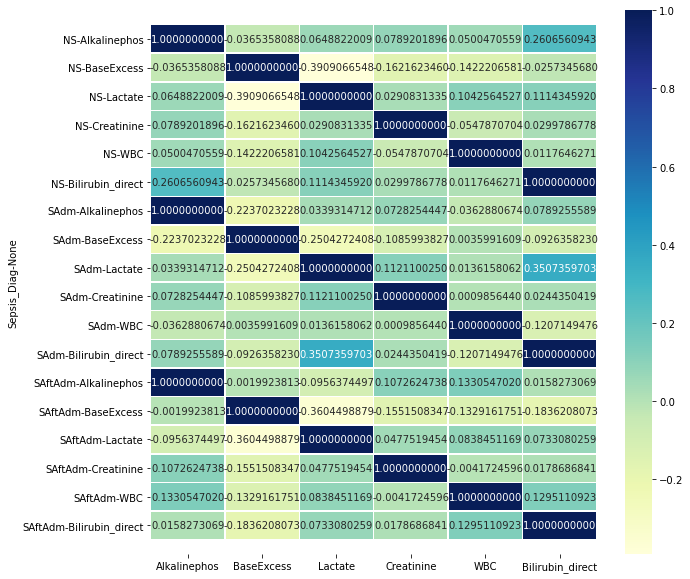

In [111]:
import matplotlib.pyplot as plt 
import seaborn as sns

corr_matrix=df_FirstVal.groupby(['Sepsis_Diag'])[['Alkalinephos','BaseExcess','Lactate', 'Creatinine','WBC','Bilirubin_direct']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".10f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)